In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import datetime

#Import data from John Hopkins CSSE 
df = pd.read_csv('time_series_covid19_confirmed_US.csv')

df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,77,82,84,93,112,113,121,121,128,130
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,6,6,6,6,6,6,6,6,6,6
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,286,316,316,452,475,513,573,620,683,725
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,30,30,37,40,42,43,43,45,45,50


In [2]:
#US total GF
#rankings

#Reformat (lat/long could be useful for regional grouping/visualization)
df.drop(['Country_Region','Lat','Long_'], axis=1,inplace=True)
df1 = df.iloc[:,6:]
df1.tail()
#some states, one cruise ship

,Province_State,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
3248,Washington,"Unassigned, Washington, US",0,0,0,0,0,0,0,0,...,303,344,501,483,533,648,677,915,838,908
3249,West Virginia,"Unassigned, West Virginia, US",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,21,0,0
3250,Wisconsin,"Unassigned, Wisconsin, US",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3251,Wyoming,"Unassigned, Wyoming, US",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3252,Grand Princess,"Grand Princess, US",0,0,0,0,0,0,0,0,...,103,103,103,103,103,103,103,103,103,103


In [3]:
#make list of states
states = df1['Province_State']
states.drop_duplicates(inplace=True)

#how many states are in the data
print(str(states.shape[0])+' states/territories')

#List of all 'States'
#for col in states: 
#    print(col) 

#50 states + 8 territories 
    #1) Diamond Princess
    #2) Grand Princess
    #3) D.C.
    #4) Samoa
    #5) Guam
    #6) Puerto Rico
    #7) Virgin Islands
    #8) North Marina Islands

58 states/territories


In [4]:
#function to form state_df
def state_func(state):
    state_len = len(state)
    dc1 = df1.loc[df['Province_State'] == state]

    dc1.drop(['Province_State'], axis=1,inplace=True)
    dc1 = dc1.T

    new_header = dc1.iloc[0] #grab the first row for the header
    dc = dc1[1:] #take the data less the header row
    dc.columns = new_header

    dc.columns = pd.Index(map(lambda x : str(x)[:-(state_len+6)], dc.columns))
    dc.columns.name = 'Date'

    sum = dc.sum(axis=1)
    dc[state] = sum
    
    return dc

In [5]:
#function to plot/compare states
def fig(state1,state2='',state3=''):
    plt.figure(figsize=(15,10))
    #-------
    df1 = state_func(state1)
    df2 = state_func(state2)
    df3 = state_func(state3)
    
    plt.plot_date(df1.index,df1[state1],ls='-',label=state1)
    if state2!='':
        plt.plot_date(df2.index,df2[state2],ls='-',label=state2)
        if state3!='':
            plt.plot_date(df3.index,df3[state3],ls='-',label=state3)
    #-------
    ax=plt.gca()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(7))

    plt.title('Total Cases: '+str(state1))
    plt.ylabel('Positive Cases')
    plt.xlabel('Date')

    plt.legend() 
    plt.xticks(rotation='vertical')

In [6]:
#plot daily cases
def plot_diff(state):
    #---------------------------------
    diff_st = state_func(state).diff()

    plt.figure(figsize=(15,10))

    #diff
    plt.bar(diff_st.index,diff_st[state],ls='-',label=state,color='indianred')
       
    ax=plt.gca()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(7))

    plt.title('Daily Cases: '+str(state))
    plt.ylabel('Positive Cases')
    plt.xlabel('Date')

    plt.legend() 
    plt.xticks(rotation='vertical')

/Users/ericoliverio/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/ericoliverio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ericoliverio/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will r

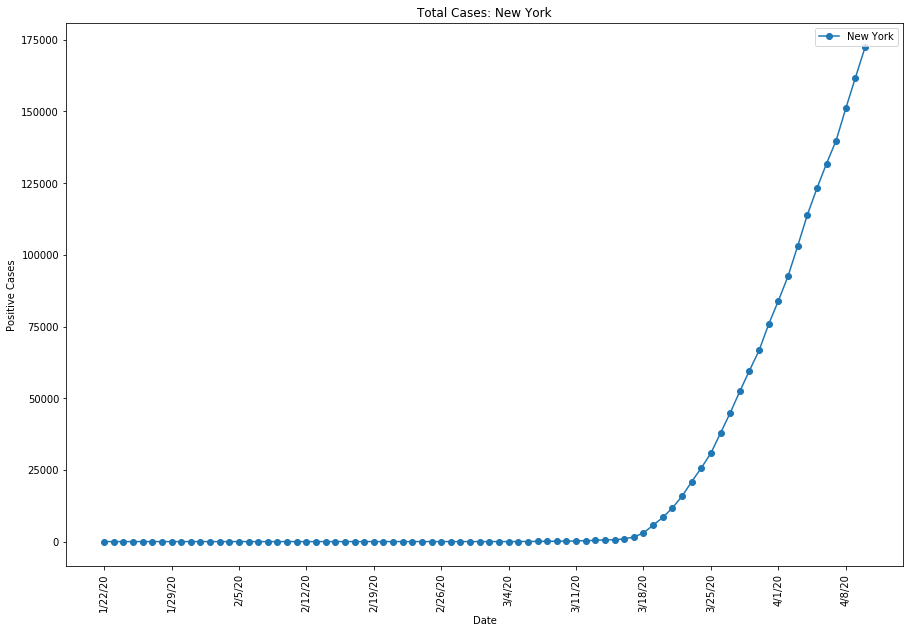

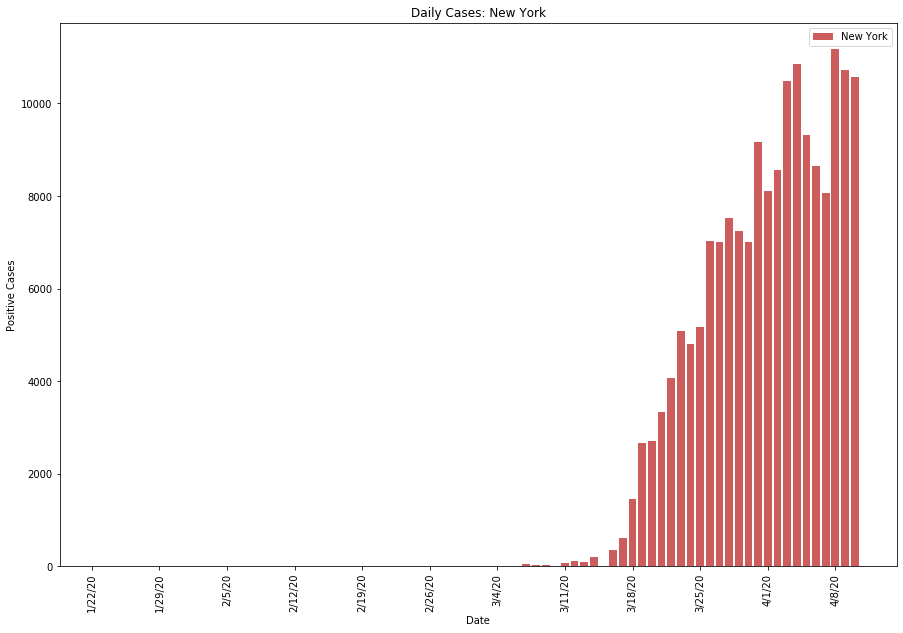

In [7]:
state = 'New York'
state_func('New York')
fig(state)
plot_diff(state)

/Users/ericoliverio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


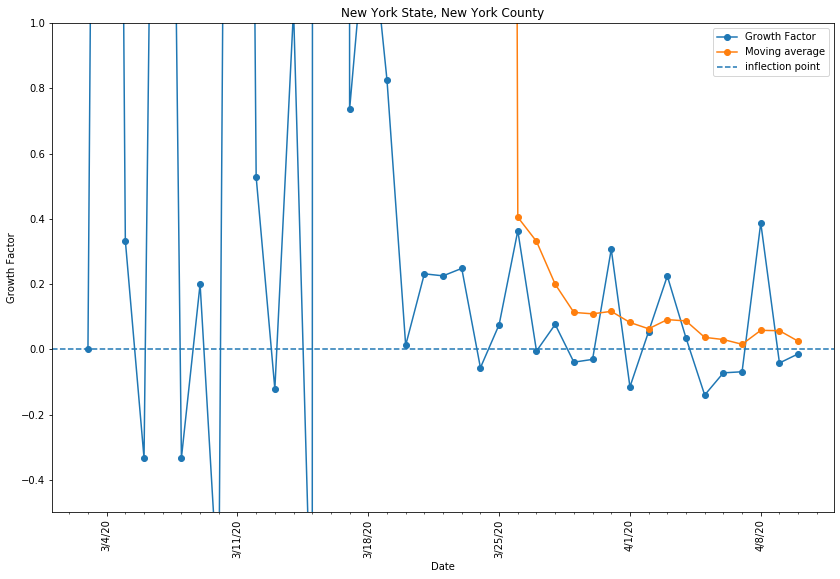

In [8]:
window = 10
state = 'New York'
county = state #Total for sum
diff_st = state_func(state).diff()

gf = diff_st.pct_change()
rol = gf.rolling(window).sum()/window

plt.figure(figsize=(14,9))

plt.plot_date(gf.index,gf[county].values,label='Growth Factor',ls='-')
plt.plot_date(rol.index,rol[county].values,label='Moving average',ls='-')


plt.xticks(rotation='vertical')
plt.title(str(state)+' State, '+str(county)+' County')
plt.ylabel('Growth Factor')
plt.xlabel('Date')

ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.axhline(0,ls='--',label='inflection point')
leg = plt.legend();
plt.ylim([-0.5, 1])

plt.show()

In [9]:
#loop over states
#run state_fun
dc = state_func('New York')
dates = dc.index

dc_tot = pd.DataFrame(dates)
dc_tot.rename(columns={ dc_tot.columns[0]: "Date" }, inplace = True)
dc_tot = dc_tot.reset_index()
dc_tot
for col in states:
    #print(state_func(col))
    #dc_tot[col] = state_func(col)
    sf = state_func(col).reset_index()
    dc_tot=pd.concat( [dc_tot, sf[col]],axis=1)

    #pos_state = state_func('New York')
#pos_state[state]
dc_tot = dc_tot.set_index('Date')

/Users/ericoliverio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [36]:
dc_tot

,index,American Samoa,Guam,Northern Mariana Islands,Puerto Rico,Virgin Islands,Alabama,Alaska,Arizona,Arkansas,...,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Diamond Princess,Grand Princess
Date,,,,,,,,,,,,,,,,,,,,,
1/22/20,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1/23/20,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1/24/20,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1/25/20,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1/26/20,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/6/20,75,0.0,113.0,6.0,513.0,43.0,1952.0,190.0,2732.0,875.0,...,8043.0,1680.0,543.0,2878.0,8311.0,345.0,2449.0,210.0,49.0,103.0
4/7/20,76,0.0,121.0,6.0,573.0,43.0,2169.0,213.0,2870.0,946.0,...,8925.0,1746.0,575.0,3335.0,8692.0,412.0,2578.0,216.0,49.0,103.0
4/8/20,77,0.0,121.0,6.0,620.0,45.0,2328.0,226.0,3036.0,1000.0,...,9777.0,1855.0,605.0,3645.0,9276.0,483.0,2710.0,221.0,49.0,103.0


In [10]:
#top 10
state = 'California'

df10 = state_func(state)
df10 = dc_tot

dft = df10.T
dft
dft.iloc[0,:]
today = len(dft.columns)-1
df_top = dft.sort_values(dft.columns[today], ascending = False).T
df_top #Buffalo/Erie is 8th!
#upstate is bad as well

/Users/ericoliverio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,New York,New Jersey,Michigan,California,Massachusetts,Pennsylvania,Louisiana,Illinois,Florida,Texas,...,North Dakota,Alaska,Wyoming,Guam,Grand Princess,index,Virgin Islands,Diamond Princess,Northern Mariana Islands,American Samoa
Date,,,,,,,,,,,,,,,,,,,,,
1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/6/20,131815.0,41090.0,17221.0,16019.0,13837.0,13127.0,14867.0,12262.0,13324.0,8043.0,...,225.0,190.0,210.0,113.0,103.0,75.0,43.0,49.0,6.0,0.0
4/7/20,139875.0,44416.0,18970.0,17351.0,15202.0,14853.0,16284.0,12271.0,14545.0,8925.0,...,237.0,213.0,216.0,121.0,103.0,76.0,43.0,49.0,6.0,0.0
4/8/20,151061.0,47437.0,20346.0,18897.0,16790.0,16631.0,17030.0,15078.0,15456.0,9777.0,...,251.0,226.0,221.0,121.0,103.0,77.0,45.0,49.0,6.0,0.0


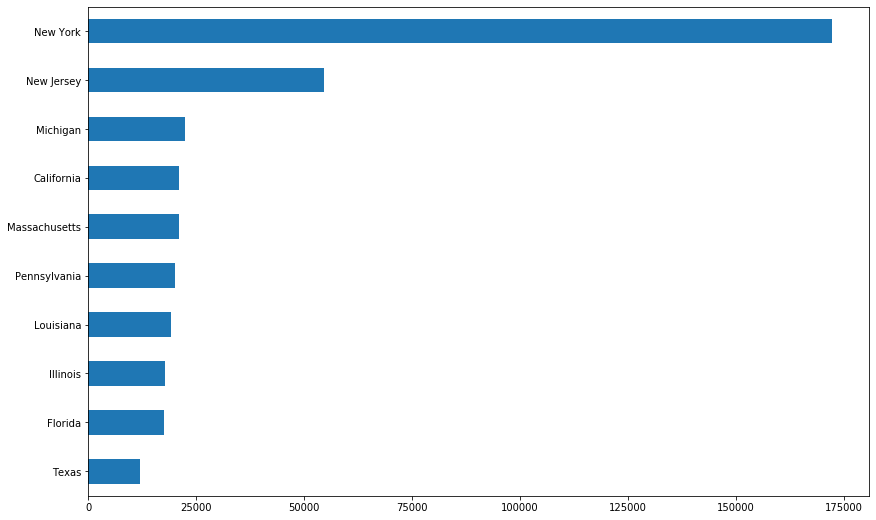

In [34]:
plt.figure(figsize=(14,9))
#.plot.bar()

df_top=df_top.iloc[:,0:10]

df10 = df_top.T['4/10/20']
ax = df10.plot(kind='barh')
ax.invert_yaxis()
plt.show()

/Users/ericoliverio/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/ericoliverio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


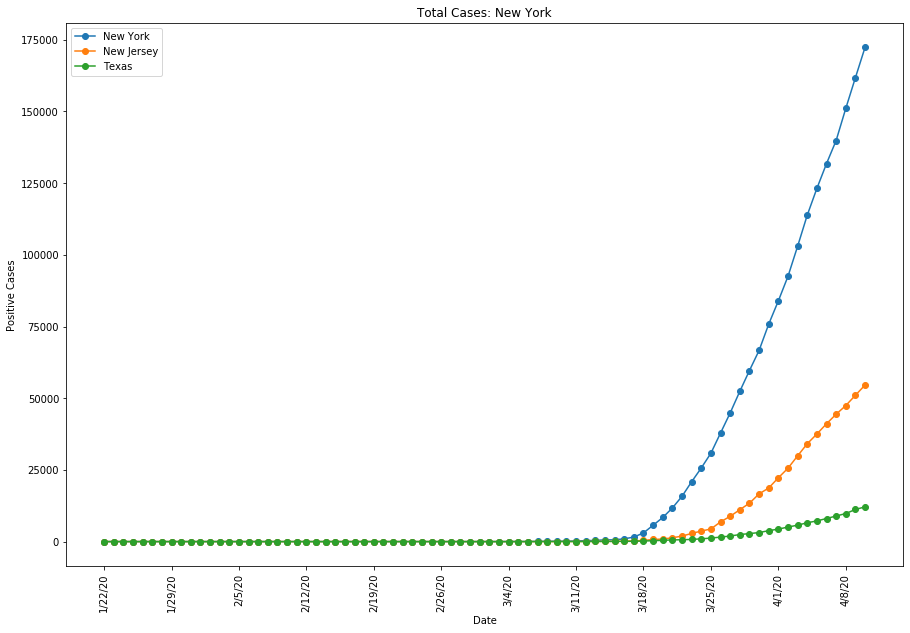

In [35]:
#TD: What are the top states? (A: NY, NJ, Mass, Michigan, California, Penn, Ill, Louis, Flo)
#Make seperate comparative function
fig('New York','New Jersey','Texas')

In [12]:
#Do this for Nation

In [13]:
#Trim plot star 3/02
#NYS most recent 4/10: 1,498

In [14]:
#Explore NY data/See 'NYS API' for more

#for col in df_ca: 
#    print(col) 



#Bronx, Queens, Brooklen (Kings County), Staten Island (Richmond County) are 0
#Manhattan is missing
#All boroughs are collected into New York City I believe

In [15]:
#state_func('Texas')

In [16]:
#function to form state_df
#def state_sum(state):
#    state_len = len(state)
#    dc1 = df1.loc[df['Province_State'] == state]
#
#    dc1.drop(['Province_State'], axis=1,inplace=True)
#    dc1 = dc1.T

#    new_header = dc1.iloc[0] #grab the first row for the header
#    dc = dc1[1:] #take the data less the header row
#    dc.columns = new_header

#    dc.columns = pd.Index(map(lambda x : str(x)[:-(state_len+6)], dc.columns))
#    dc.columns.name = 'Date'

#    sum = dc.sum(axis=1)
    
    
#    return sum